# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
      --------------------------------------- 10.2/675.6 kB ? eta -:--:--
      --------------------------------------- 10.2/675.6 kB ? eta -:--:--
     -- ---------------------------------- 41.0/675.6 kB 326.8 kB/s eta 0:00:02
     ------ ----------------------------- 112.6/675.6 kB 726.2 kB/s eta 0:00:01
     ---------- ------------------------- 194.6/675.6 kB 980.4 kB/s eta 0:00:01
     ---------------- --------------------- 286.7/675.6 kB 1.2 MB/s eta 0:00:01
     ------------------- ------------------ 337.9/675.6 kB 1.2 MB/s eta 0:00:01
     ----------------------- -------------- 419.8/675.6 kB 1.2 MB/s eta 0:00:01
     -------------------------- ----------- 471.0/675.6 kB 1.3 MB/s eta 0:00:01
     --------------------------------- ---- 604.2/675.6 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 675.6/675.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metada

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


In [4]:
cities

['khairpur',
 'namibe',
 'port-aux-francais',
 'edinburgh of the seven seas',
 'sao gabriel da cachoeira',
 'maceio',
 'regina',
 'puerto baquerizo moreno',
 'thompson',
 'papao',
 'arawa',
 'porto novo',
 'margaret river',
 'puerto natales',
 'port lincoln',
 'pleszew',
 'degerfors',
 'talnakh',
 'benjamin aceval',
 'waitangi',
 'adamstown',
 'geraldton',
 'invercargill',
 'bethel',
 'yellowknife',
 'cable beach',
 'nizhnevartovsk',
 'kodiak',
 'rouissat',
 'blackmans bay',
 'tranovaho',
 'alta',
 'klaksvik',
 'mahavelona',
 'lorengau',
 'ta`u',
 'iqaluit',
 'papatowai',
 'north bend',
 'khandyga',
 'kachug',
 'san juan de miraflores',
 'roswell',
 'essaouira',
 'likasi',
 'tucuma',
 'iskateley',
 'hermanus',
 'mount isa',
 'ribeira grande',
 'albany',
 'revda',
 'tura',
 'garachico',
 'margate',
 'susuman',
 'aasiaat',
 'yuncheng',
 'tazovsky',
 'hamilton',
 'avarua',
 'ushuaia',
 'grytviken',
 'chhuikhadan',
 'tazacorte',
 'rakops',
 'olonkinbyen',
 'adrar',
 'stanley',
 'menongue',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=san francisco")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=7bd8ea4ead8a0e0e5581e34203bec2aa&q=san francisco


In [6]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

       # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

  # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khairpur
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | sao gabriel da cachoeira
Processing Record 6 of Set 1 | maceio
Processing Record 7 of Set 1 | regina
Processing Record 8 of Set 1 | puerto baquerizo moreno
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | papao
Processing Record 11 of Set 1 | arawa
Processing Record 12 of Set 1 | porto novo
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | pleszew
Processing Record 17 of Set 1 | degerfors
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | benjamin aceval
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | adamstown
Processing Recor

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
#city_data_df.count()

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khairpur,27.5295,68.7617,30.94,27,0,2.13,PK,1730433140
1,namibe,-15.1961,12.1522,16.87,84,96,1.81,AO,1730433142
2,port-aux-francais,-49.3500,70.2167,4.09,84,100,11.52,TF,1730433143
3,edinburgh of the seven seas,-37.0676,-12.3116,13.91,87,62,9.39,SH,1730433144
4,sao gabriel da cachoeira,-0.1303,-67.0892,25.09,70,61,1.13,BR,1730433145


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khairpur,27.5295,68.7617,30.94,27,0,2.13,PK,1730433140
1,namibe,-15.1961,12.1522,16.87,84,96,1.81,AO,1730433142
2,port-aux-francais,-49.3500,70.2167,4.09,84,100,11.52,TF,1730433143
3,edinburgh of the seven seas,-37.0676,-12.3116,13.91,87,62,9.39,SH,1730433144
4,sao gabriel da cachoeira,-0.1303,-67.0892,25.09,70,61,1.13,BR,1730433145


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

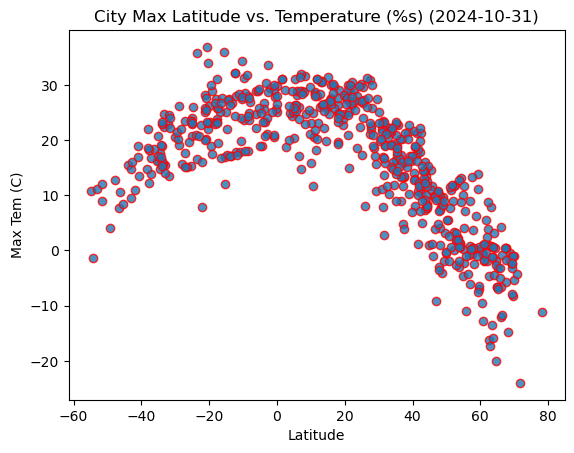

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor = 'red',
    linewidths = 1,
    marker = 'o',
    alpha = 0.8,
    label = "Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature (%s) ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Tem (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

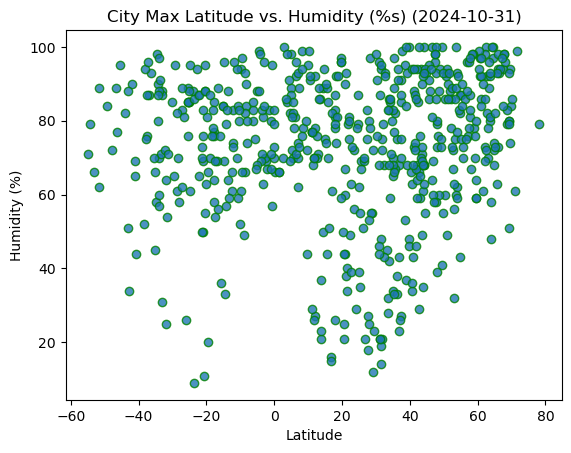

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor = 'green',
    linewidths = 1,
    marker = 'o',
    alpha = 0.8,
    label = "Cities"
)
# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity (%s) ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

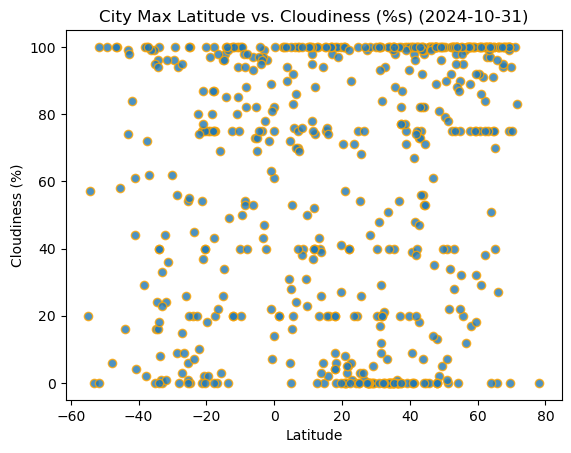

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor = 'orange',
    linewidths = 1,
    marker = 'o',
    alpha = 0.8,
    label = "Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Cloudiness (%s) ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

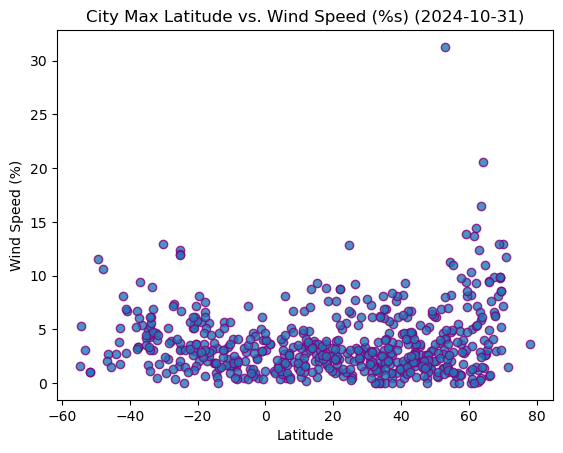

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor = 'purple',
    linewidths = 1,
    marker = 'o',
    alpha = 0.8,
    label = "Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Wind Speed (%s) ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize = 15, color = 'red')
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khairpur,27.5295,68.7617,30.94,27,0,2.13,PK,1730433140
6,regina,50.4501,-104.6178,5.58,60,100,6.17,CA,1730432932
8,thompson,55.7435,-97.8558,-10.91,73,20,0.00,CA,1730433150
11,porto novo,6.4965,2.6036,25.90,92,24,1.69,BJ,1730433154
15,pleszew,51.8964,17.7855,9.01,88,34,6.90,PL,1730433158


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,namibe,-15.1961,12.1522,16.87,84,96,1.81,AO,1730433142
2,port-aux-francais,-49.3500,70.2167,4.09,84,100,11.52,TF,1730433143
3,edinburgh of the seven seas,-37.0676,-12.3116,13.91,87,62,9.39,SH,1730433144
4,sao gabriel da cachoeira,-0.1303,-67.0892,25.09,70,61,1.13,BR,1730433145
5,maceio,-9.6658,-35.7353,23.69,94,20,2.06,BR,1730433146


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.769590774120381


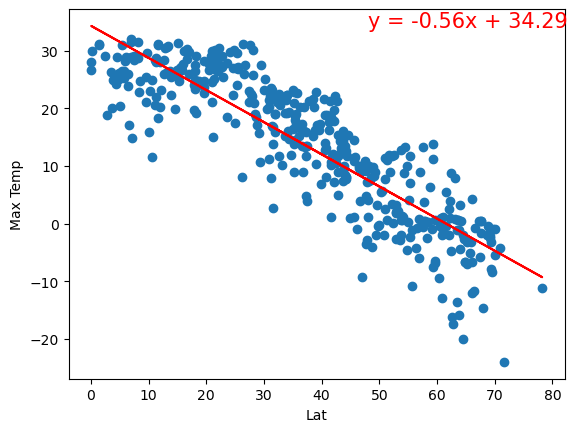

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (48, 34))

The r-value is 0.4391148305423832


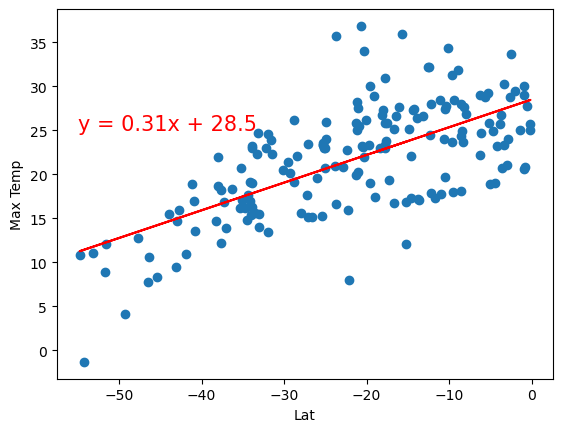

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 25))

**Discussion about the linear relationship:** The relationship between latitude and temperature is non-linear as well. The values are scattered through different latitudes & temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.03993833932888414


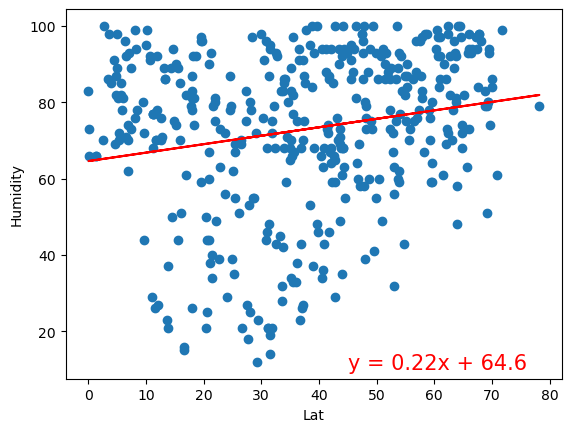

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (45, 10))

The r-value is 0.002551773503640817


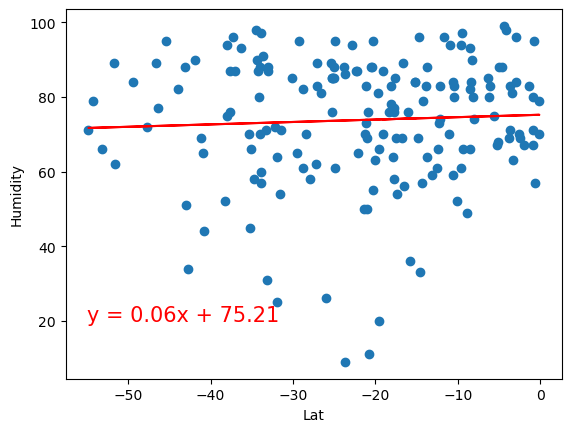

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55, 20))

**Discussion about the linear relationship:** The relationship between latitude and humidity is non-linear as well. The values are scattered through different latitudes & humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.06648276157642753


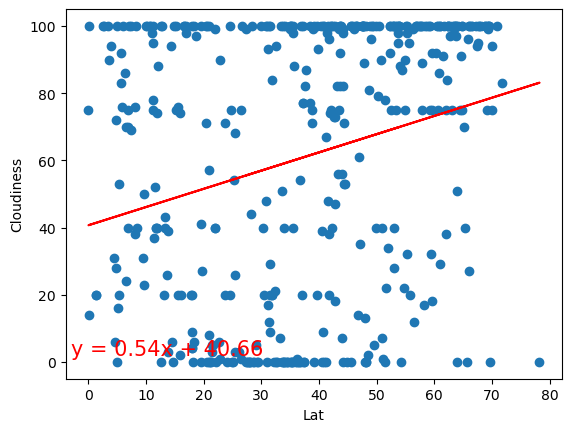

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-3, 2))

The r-value is 0.05155365733283037


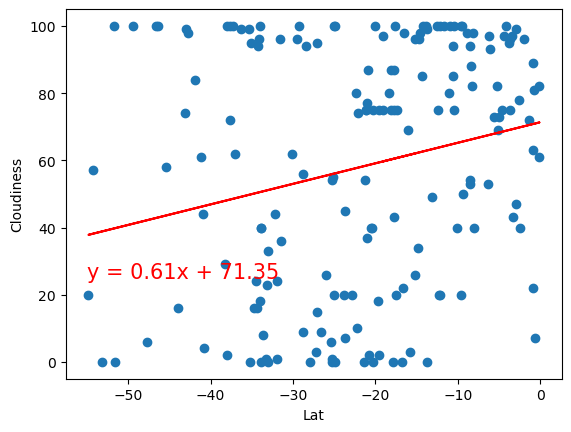

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55, 25))

**Discussion about the linear relationship:** The relationship between latitude and cloudiness is non-linear. The values are scattered throughout the plit without any specific linear direction.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.06609292834555096


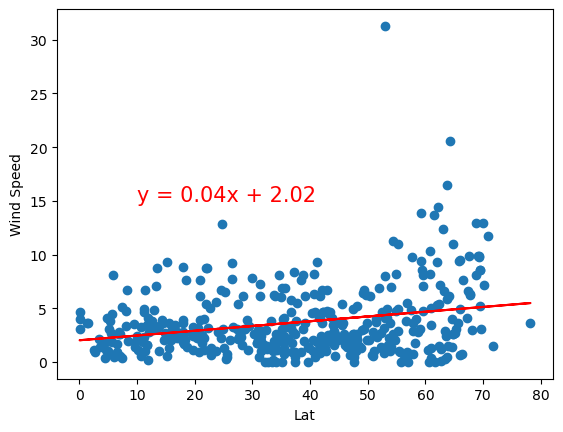

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 15))

The r-value is 0.0811858806834982


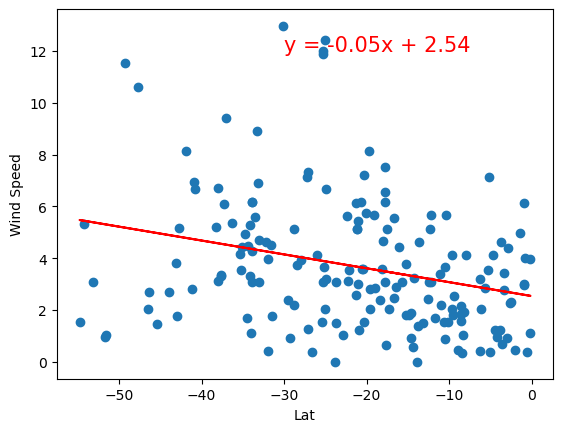

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-30, 12))

**Discussion about the linear relationship:** The relationship between latitude and wind speed is non-linear as well. The values are scattered through different latitudes & speeds.